In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
import sklearn

In [2]:
audi=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/audi.csv")
bmw=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/bmw.csv")
ford=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/ford.csv")
hyundai=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/hyundi.csv")
mercedes=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/merc.csv")
skoda=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/skoda.csv")
toyota=pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/100%2C000%20UK%20Used%20Car%20Data%20set/toyota.csv")

In [3]:
audi["company"]="audi"
bmw["company"]="bmw"
ford["company"]="ford"
hyundai["company"]="hyundai"
mercedes["company"]="mercedes"
skoda["company"]="skoda"
toyota["company"]="toyota"
original=[audi,bmw,ford,hyundai,mercedes,skoda,toyota]
original=pd.concat(original)
df=original.copy()

In [4]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,tax(£)
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi,NaN
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi,NaN
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi,NaN
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi,NaN
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi,NaN


In [5]:
df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,company,tax(£)
6733,IQ,2011,5500,Automatic,30000,Petrol,20.0,58.9,1.0,toyota,NaN
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,125.0,50.4,1.3,toyota,NaN
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,125.0,57.6,1.4,toyota,NaN
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,125.0,50.4,1.3,toyota,NaN
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,125.0,50.4,1.3,toyota,NaN


In [6]:
df.shape

(70398, 11)

In [7]:
df.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize', 'company', 'tax(£)'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70398 entries, 0 to 6737
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         70398 non-null  object 
 1   year          70398 non-null  int64  
 2   price         70398 non-null  int64  
 3   transmission  70398 non-null  object 
 4   mileage       70398 non-null  int64  
 5   fuelType      70398 non-null  object 
 6   tax           65538 non-null  float64
 7   mpg           70398 non-null  float64
 8   engineSize    70398 non-null  float64
 9   company       70398 non-null  object 
 10  tax(£)        4860 non-null   float64
dtypes: float64(4), int64(3), object(4)
memory usage: 6.4+ MB


In [9]:
df.describe()

,year,price,mileage,tax,mpg,engineSize,tax(£)
count,70398.000000,70398.000000,70398.000000,65538.000000,70398.000000,70398.000000,4860.000000
mean,2017.076550,18037.205361,23181.649095,120.223229,56.174424,1.724401,121.147119
std,2.141514,10597.516999,21342.702158,64.980767,17.421733,0.605706,58.003289
min,1970.000000,495.000000,1.000000,0.000000,1.100000,0.000000,0.000000
25%,2016.000000,10700.000000,7374.000000,125.000000,47.900000,1.200000,125.000000
50%,2017.000000,15750.000000,17410.000000,145.000000,56.500000,1.600000,145.000000
75%,2019.000000,22450.000000,32466.750000,145.000000,64.200000,2.000000,145.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000,555.000000


In [10]:
df.count()

model           70398
year            70398
price           70398
transmission    70398
mileage         70398
fuelType        70398
tax             65538
mpg             70398
engineSize      70398
company         70398
tax(£)           4860
dtype: int64

In [11]:
df.isna().any()

model           False
year            False
price           False
transmission    False
mileage         False
fuelType        False
tax              True
mpg             False
engineSize      False
company         False
tax(£)           True
dtype: bool

In [12]:
df.isna().sum()

model               0
year                0
price               0
transmission        0
mileage             0
fuelType            0
tax              4860
mpg                 0
engineSize          0
company             0
tax(£)          65538
dtype: int64

In [13]:
df.drop(["tax","tax(£)"],axis=1, inplace=True)
df["year"].value_counts()

2019    18915
2017    15661
2016    10701
2018    10069
2015     5422
2020     2989
2014     2964
2013     1966
2012      457
2011      303
2010      231
2009      209
2008      146
2007      116
2006       59
2005       53
2004       42
2003       27
2002       25
2001       14
1998        8
2000        8
1999        6
1997        3
1996        2
2060        1
1970        1
Name: year, dtype: int64

In [14]:
df.drop(df[df["year"]==2060].index,axis=0,inplace=True)
age = 2021 - df['year']
df['age'] = age
df["age"].describe()

count    70397.000000
mean         3.924059
std          2.135410
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max         51.000000
Name: age, dtype: float64

In [15]:
carage=df["age"].value_counts().reset_index()
carage.columns=["age","count"]
carage.head()

,age,count
0,2,18915
1,4,15661
2,5,10701
3,3,10069
4,6,5422


In [16]:
df["price"].describe()

count     70397.00000
mean      18037.36932
std       10597.50298
min         495.00000
25%       10700.00000
50%       15750.00000
75%       22450.00000
max      159999.00000
Name: price, dtype: float64

In [17]:
df["transmission"].value_counts()

Manual       35048
Semi-Auto    18432
Automatic    16911
Other            6
Name: transmission, dtype: int64

In [18]:
df["transmission"].value_counts()

Manual       35048
Semi-Auto    18432
Automatic    16911
Other            6
Name: transmission, dtype: int64

In [19]:
df.drop(df[df["transmission"]=="Other"].index,axis=0,inplace=True)
df["mileage"].describe()

count     70364.000000
mean      23182.381971
std       21344.356740
min           1.000000
25%        7374.000000
50%       17408.500000
75%       32467.500000
max      323000.000000
Name: mileage, dtype: float64

In [20]:
df["mileage"].describe()

count     70364.000000
mean      23182.381971
std       21344.356740
min           1.000000
25%        7374.000000
50%       17408.500000
75%       32467.500000
max      323000.000000
Name: mileage, dtype: float64

In [21]:
df[df["mileage"]<7000].describe()

,year,price,mileage,mpg,engineSize,age
count,16840.00000,16840.000000,16840.000000,16840.000000,16840.000000,16840.00000
mean,2018.98652,26421.062648,3256.524109,49.291882,1.782815,2.01348
std,0.73569,13029.032309,2126.953381,15.359127,0.648518,0.73569
min,2007.00000,1299.000000,1.000000,1.100000,0.000000,1.00000
25%,2019.00000,17790.000000,1403.500000,40.400000,1.300000,2.00000
50%,2019.00000,24950.000000,3314.000000,47.900000,2.000000,2.00000
75%,2019.00000,31699.000000,5000.000000,56.500000,2.000000,2.00000
max,2020.00000,159999.000000,6999.000000,470.800000,6.200000,14.00000


In [22]:
df.drop(df[df["mileage"]==1].index,axis=0,inplace=True)
df["fuelType"].value_counts()

Petrol      35518
Diesel      31685
Hybrid       2925
Other         158
Electric        5
Name: fuelType, dtype: int64

In [23]:
df.drop(df[df["fuelType"]=="Other"].index,axis=0,inplace=True)
df["mpg"].describe()

count    69422.000000
mean        56.093805
std         16.738420
min          1.100000
25%         47.900000
50%         56.500000
75%         64.200000
max        470.800000
Name: mpg, dtype: float64

In [24]:
df.drop(df[df["mpg"]==1.100000].index,axis=0,inplace=True)
df["engineSize"].describe()

count    69372.000000
mean         1.723926
std          0.604940
min          0.000000
25%          1.200000
50%          1.600000
75%          2.000000
max          6.600000
Name: engineSize, dtype: float64

Text(0, 0.5, 'Count')

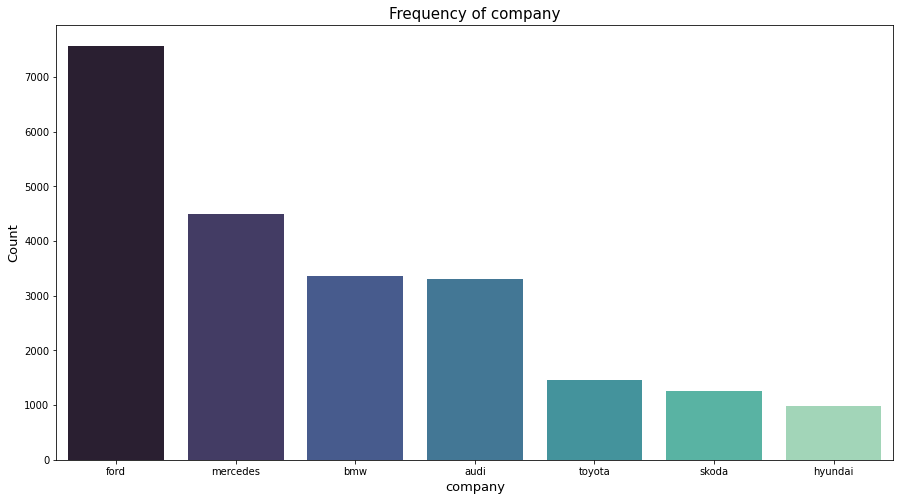

In [25]:
df.drop(df[df["engineSize"]<=1.0000000].index,axis=0,inplace=True)
plt.figure(figsize=(15,8))
count_of_model = df['company'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='company',order=count_of_model.index,palette="mako")
plt.title('Frequency of company',size=15)
plt.xlabel('company',size=13)
plt.ylabel('Count',size=13)

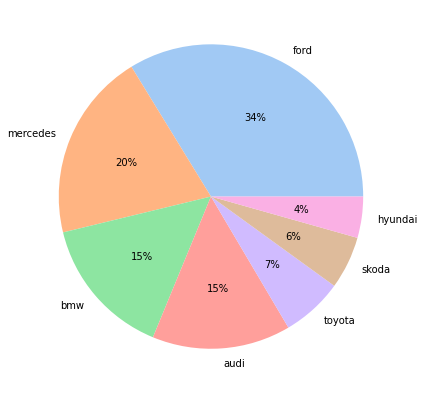

In [26]:
pie=df["company"].value_counts().reset_index()
pie.columns=["company","count"]
plt.figure(figsize=(12,7))
color=sns.color_palette("pastel")
plt.pie(pie["count"],colors=color,autopct='%.0f%%',labels=pie["company"])
plt.show()

In [27]:
brand_count=df
px.treemap(brand_count,path=["company"],title=" The most bought car brand :")

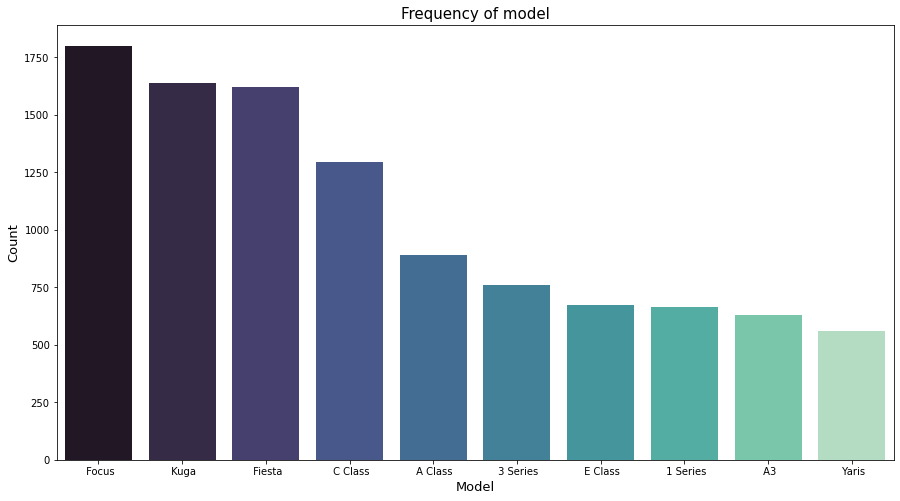

In [28]:
model=df["model"].value_counts().reset_index()
model.columns=["model","count"]
plt.figure(figsize=(15,8))
count_of_model = df['model'].value_counts()[0:10].sort_values(ascending=False)
sns.countplot(data=df, x='model',order=count_of_model.index,palette="mako")
plt.title('Frequency of model',size=15)
plt.xlabel('Model',size=13)
plt.ylabel('Count',size=13)
plt.show()

In [29]:
model_count=df
px.treemap(model_count,path=["model"],title="Popularity of the bought car model:")

In [30]:
transmission=df["transmission"].value_counts().reset_index()
transmission.columns=["transmission","count"]
transmission

,transmission,count
0,Manual,10845
1,Automatic,6322
2,Semi-Auto,5267


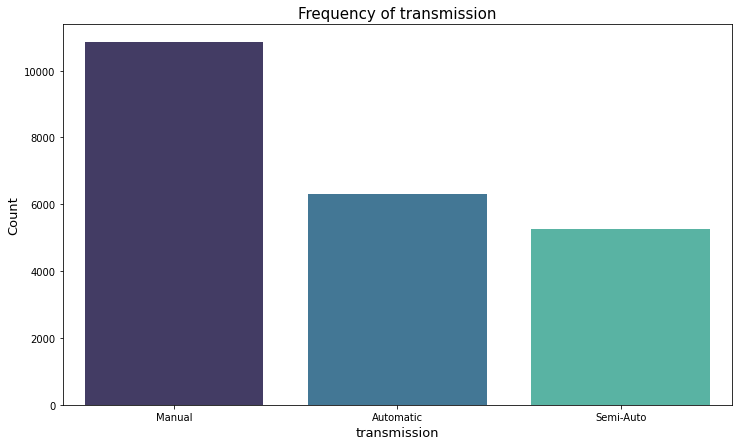

In [31]:
plt.figure(figsize=(12,7))
counttrans=df["transmission"].value_counts().sort_values(ascending=False)
sns.countplot(data=df ,x="transmission" , order=counttrans.index,palette="mako") 
plt.title('Frequency of transmission',size=15)
plt.xlabel('transmission',size=13)
plt.ylabel('Count',size=13)
plt.show()

In [32]:
fuelType=df["fuelType"].value_counts().reset_index()
fuelType.columns=["fuelType","count"]
fuelType

,fuelType,count
0,Diesel,12801
1,Petrol,8703
2,Hybrid,929
3,Electric,1


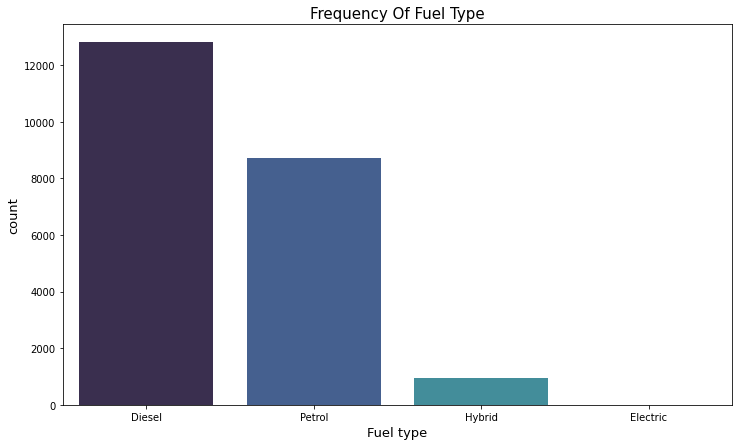

In [33]:
plt.figure(figsize=(12,7))
countfuel=df["fuelType"].value_counts().sort_values(ascending=False)
sns.countplot(data=df , x="fuelType",order=countfuel.index,palette="mako")
plt.title("Frequency Of Fuel Type",size=15)
plt.xlabel("Fuel type",size=13)
plt.ylabel("count" , size=13)
plt.show()

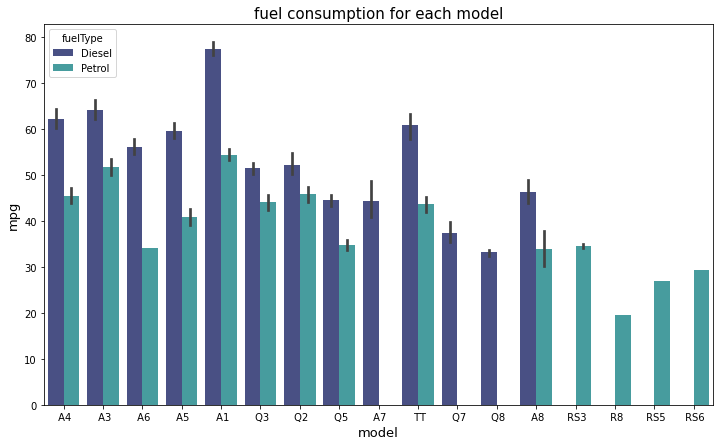

In [34]:
plt.figure(figsize=(12,7))
sns.barplot(x="model",y="mpg",data=df[0:1000],hue="fuelType",palette="mako")
plt.title("fuel consumption for each model",size=15)
plt.xlabel("model",size=13)
plt.ylabel("mpg" , size=13)
plt.show()

Text(0, 0.5, 'Count')

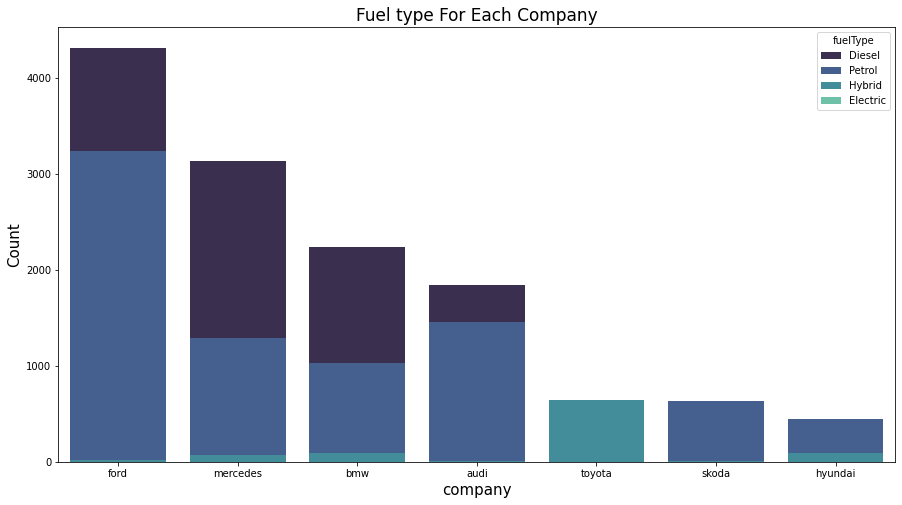

In [35]:
plt.figure(figsize=(15,8))
count_of_model = df['company'].value_counts().sort_values(ascending=False)
sns.countplot(data=df, x='company',order=count_of_model.index,palette="mako",hue="fuelType",dodge=False)
plt.title('Fuel type For Each Company',size=17)
plt.xlabel('company',size=15)
plt.ylabel('Count',size=15)